<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


*   Extract information from a given web site
*   Write the scraped data into a csv file.


## Extract information from the given web site

You will extract the data from the below web site: <br>


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
from bs4 import BeautifulSoup 
import requests  
import pandas as pd

Download the webpage at the url


In [3]:
#your code goes here
data  = requests.get(url).text 

Create a soup object


In [4]:
#your code goes here
soup = BeautifulSoup(data,"html5lib") 

Scrape the `Language name` and `annual average salary`.


In [6]:
#your code goes here
table = soup.find('table')
language_list = []
for row in table.find_all('tr'): 
    cols = row.find_all('td') 
    Language_name = cols[1].getText() 
    Annual_average_salary = cols[3].getText() 
    print("{}--->{}".format(Language_name, Annual_average_salary))
    language_list.append([Language_name, Annual_average_salary])

Language--->Average Annual Salary
Python--->$114,383
Java--->$101,013
R--->$92,037
Javascript--->$110,981
Swift--->$130,801
C++--->$113,865
C#--->$88,726
PHP--->$84,727
SQL--->$84,793
Go--->$94,082


Save the scrapped data into a file named *popular-languages.csv*


In [7]:
# your code goes here
df_lang = pd.DataFrame(language_list, columns=['Language','Average Annual Salary']) 
filename = "popular-languages.csv"
df_lang.to_csv(filename)
df = pd.read_csv(filename, header=1) 
df

,0,Language,Average Annual Salary
0,1,Python,"$114,383"
1,2,Java,"$101,013"
2,3,R,"$92,037"
3,4,Javascript,"$110,981"
4,5,Swift,"$130,801"
5,6,C++,"$113,865"
6,7,C#,"$88,726"
7,8,PHP,"$84,727"
8,9,SQL,"$84,793"
9,10,Go,"$94,082"


In [8]:
# clean data
df['Average Annual Salary'].replace('[\$,]', '', regex=True, inplace=True)
df['Average Annual Salary'] = df['Average Annual Salary'].astype(float)
df.sort_values('Average Annual Salary', ascending=False, inplace=True)
del df['0']
df = df.set_index('Language')
df

,Average Annual Salary
Language,
Swift,130801.0
Python,114383.0
C++,113865.0
Javascript,110981.0
Java,101013.0
Go,94082.0
R,92037.0
C#,88726.0
SQL,84793.0


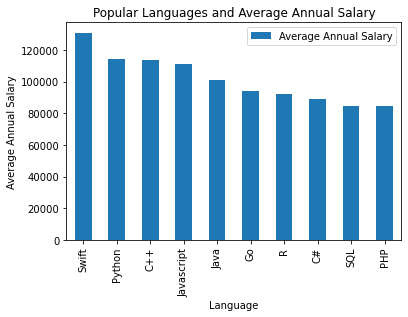

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

df.plot(kind='bar', label=True)
plt.title("Popular Languages and Average Annual Salary")
plt.xlabel("Language")
plt.ylabel("Average Annual Salary")

plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01).
